#########################

## Example use of xarray/dask/xgcm with CROCO files

    works with or without CURVGRID
    works with or without XIOS
    works with older ROMS ucla/agrif files


- Interpolation to horizontal grids
- Computation of derivatives (relative vorticity)
- Plotting vertical section
- Interpolation on a geopotential level

#########################

Examples adapted from https://github.com/slgentil/croco/blob/master/tutorials/xgcm.ipynb

#########################



In [1]:

import numpy as np

import xarray as xr
import xcroco as xc

from netCDF4 import Dataset
import matplotlib.pyplot as plt

%matplotlib inline


# Open the dataset

In [33]:

# Example 1: CROCO file without CURVGRID (test case)
hisfile = '/net/libra/local/tmp/1/gula/ROMS/roms_for_ModNum/2122/case_seamount/basin_his.nc'
#hisfile = '/net/libra/local/tmp/1/gula/ROMS/roms_for_ModNum/1718//case12/basin_his.nc'

# Example 2: regular realistic CROCO file 
#hisfile = '/data0/project/meddle/gula/ROMS/Simulations/GIGATL/GIGATL1/gigatl1_1h_tides_region_01_2009-02-01.nc'
#hisfile='2223/CROCO_FILES/croco_his.nc'

# Example 3: XIOS realistic CROCO file 
#hisfile = '/net/omega/local/tmp/1/gula/GIGATL6/GIGATL6_1h_tides/HIS/GIGATL6_5d_aver.mean.2005-2011.nc'
#grdfile = '/net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL6/gigatl6_grd_masked.nc'

# Example 4: ROMS UCLA file
#hisfile='/net/krypton/data0/project/meddle/gula/ROMS/Simulations/PACBIG/HIS/pacbig_his.0402.nc'
#grdfile='/net/krypton/data0/project/meddle/gula/ROMS/Simulations/PACBIG/pacbig_grd_nw_dig.nc'


#######################

ds = xr.open_dataset(hisfile)
ds = xc.adjust_coords(ds)

########
# Just keep last time-step

ds = ds.isel(time=-1)
ds

for regular CROCO files


<xarray.Dataset>
Dimensions:     (xi_rho: 62, xi_u: 61, eta_rho: 52, eta_v: 51, s_rho: 10,
                 s_w: 11, auxil: 4)
Coordinates:
  * xi_rho      (xi_rho) float32 1.0 2.0 3.0 4.0 5.0 ... 59.0 60.0 61.0 62.0
  * xi_u        (xi_u) float32 1.5 2.5 3.5 4.5 5.5 ... 57.5 58.5 59.5 60.5 61.5
  * eta_rho     (eta_rho) float32 1.0 2.0 3.0 4.0 5.0 ... 49.0 50.0 51.0 52.0
  * eta_v       (eta_v) float32 1.5 2.5 3.5 4.5 5.5 ... 47.5 48.5 49.5 50.5 51.5
  * s_rho       (s_rho) float32 -0.95 -0.85 -0.75 -0.65 ... -0.25 -0.15 -0.05
  * s_w         (s_w) float32 -1.0 -0.9 -0.8 -0.7 -0.6 ... -0.3 -0.2 -0.1 0.0
    x_rho       (eta_rho, xi_rho) float32 ...
    y_rho       (eta_rho, xi_rho) float32 ...
    time        float64 6.221e+07
Dimensions without coordinates: auxil
Data variables: (12/21)
    spherical   |S1 ...
    xl          float32 ...
    el          float32 ...
    Vtransform  float32 ...
    sc_r        (s_rho) float32 ...
    sc_w        (s_w) float32 ...
    ...          ...
    zeta        (eta_rho, xi_rho) float32 ...
    ubar        (eta_rho, xi_u) float32 ...
    vbar        (eta_v, xi_rho) float32 ...
    u           (s_rho, eta_rho, xi_u) float32 ...
    v           (s_rho, eta_v, xi_rho) float32 ...
    temp        (s_rho, eta_rho, xi_rho) float32 ...
Attributes: (12/68)
    type:           ROMS history file
    title:          \tBasin Example
    date:           
    rst_file:       basin_rst.nc
    his_file:       basin_his.nc
    avg_file:       basin_avg.nc
    ...             ...
    levbfrc:        1
    levbfrc_expl:   Deepest level for body-force stress
    gamma2:         -1.0
    gamma2_expl:    Slipperiness parameter
    SRCS:           main.F step.F read_inp.F timers_roms.F init_scalars.F ini...
    CPP-options:    BASIN OPENMP SOLVE3D UV_COR UV_ADV UV_HADV_UP3 UV_VIS2 UV...

In [34]:
if 'h' not in ds:
    # add static variables from a separate grid file to the dataset
    grd = xr.open_dataset(grdfile)
    grd = adjust_coords(grd)
    ds = add_grd(ds,grd)


########
# Add vertical coordinate (z)
ds = xc.add_vertical_coord(ds)

########
# Add an xgcm Grid instance to the dataset
ds = xc._compute_metrics_curvilinear(ds)
grid = ds.attrs['xgcm-Grid']

########

if 'lon_rho' in ds:
    xdim = 'lon'; ydim = 'lat'
else:
    xdim = 'x'; ydim = 'y'
   
######## 
    
ds

<xarray.Dataset>
Dimensions:     (xi_rho: 62, xi_u: 61, eta_rho: 52, eta_v: 51, s_rho: 10,
                 s_w: 11, auxil: 4)
Coordinates: (12/13)
  * xi_rho      (xi_rho) float32 1.0 2.0 3.0 4.0 5.0 ... 59.0 60.0 61.0 62.0
  * xi_u        (xi_u) float32 1.5 2.5 3.5 4.5 5.5 ... 57.5 58.5 59.5 60.5 61.5
  * eta_rho     (eta_rho) float32 1.0 2.0 3.0 4.0 5.0 ... 49.0 50.0 51.0 52.0
  * eta_v       (eta_v) float32 1.5 2.5 3.5 4.5 5.5 ... 47.5 48.5 49.5 50.5 51.5
  * s_rho       (s_rho) float32 -0.95 -0.85 -0.75 -0.65 ... -0.25 -0.15 -0.05
  * s_w         (s_w) float32 -1.0 -0.9 -0.8 -0.7 -0.6 ... -0.3 -0.2 -0.1 0.0
    ...          ...
    y_rho       (eta_rho, xi_rho) float32 -2.8e+04 -2.8e+04 ... 2.828e+06
    time        float64 6.221e+07
    z_rho       (s_rho, eta_rho, xi_rho) float32 -4.678e+03 ... -212.9
    z_w         (s_w, eta_rho, xi_rho) float32 -5e+03 -5e+03 ... -0.01968 0.0
    z_u         (s_rho, eta_rho, xi_u) float32 -4.678e+03 -4.678e+03 ... -212.9
    z_v         (s_rho, eta_v, xi_rho) float32 -4.678e+03 -4.678e+03 ... -212.9
Dimensions without coordinates: auxil
Data variables: (12/40)
    spherical   |S1 ...
    xl          float32 ...
    el          float32 ...
    Vtransform  int64 1
    sc_r        (s_rho) float32 -0.95 -0.85 -0.75 -0.65 ... -0.25 -0.15 -0.05
    sc_w        (s_w) float32 -1.0 -0.9 -0.8 -0.7 -0.6 ... -0.3 -0.2 -0.1 0.0
    ...          ...
    dz_v        (s_rho, eta_v, xi_rho) float32 632.3 632.3 632.3 ... 426.3 426.3
    dz_psi      (s_rho, eta_v, xi_u) float32 632.3 632.3 632.3 ... 426.3 426.3
    rArho       (eta_v, xi_u) float32 3.36e+09 3.36e+09 ... 3.36e+09 3.36e+09
    rAu         (eta_v, xi_rho) float32 3.36e+09 3.36e+09 ... 3.36e+09 3.36e+09
    rAv         (eta_rho, xi_u) float32 3.36e+09 3.36e+09 ... 3.36e+09 3.36e+09
    rApsi       (eta_rho, xi_rho) float32 3.36e+09 3.36e+09 ... 3.36e+09
Attributes: (12/69)
    type:           ROMS history file
    title:          \tBasin Example
    date:           
    rst_file:       basin_rst.nc
    his_file:       basin_his.nc
    avg_file:       basin_avg.nc
    ...             ...
    levbfrc_expl:   Deepest level for body-force stress
    gamma2:         -1.0
    gamma2_expl:    Slipperiness parameter
    SRCS:           main.F step.F read_inp.F timers_roms.F init_scalars.F ini...
    CPP-options:    BASIN OPENMP SOLVE3D UV_COR UV_ADV UV_HADV_UP3 UV_VIS2 UV...
    xgcm-Grid:      <xgcm.Grid>\nx Axis (not periodic, boundary='extend'):\n ...

# Plot SST

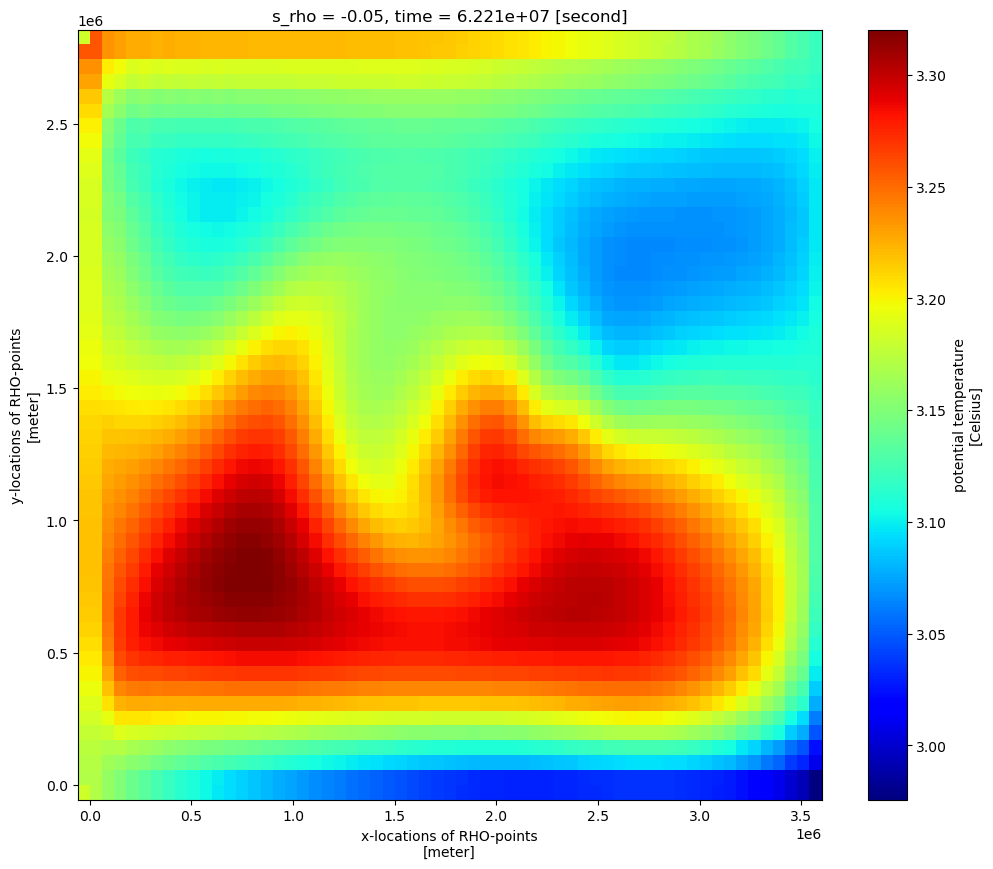

In [35]:
ds.temp.where(ds.mask_rho==1).isel(s_rho=-1,xi_rho=slice(0,-1) ).plot(x=xdim + '_rho',\
                                                                      y=ydim + '_rho',\
                                                                      cmap='jet',  figsize=(12,10))


---

## Interpolation to the intermediate grid point : Kinetic energy
\begin{equation}
\frac{1}{2}(u^2 + v^2)
\end{equation}

CPU times: user 48 ms, sys: 0 ns, total: 48 ms
Wall time: 47.7 ms


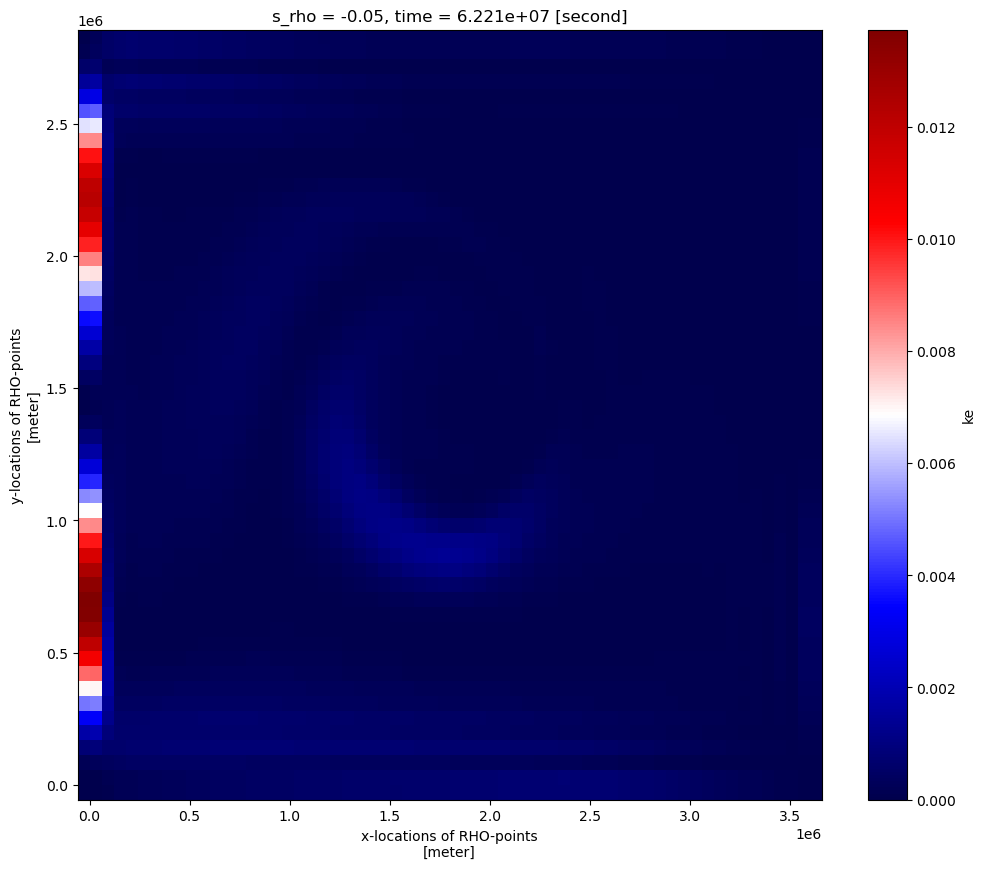

In [36]:
%%time
ds['ke'] = 0.5 * (grid.interp(ds.u**2,'x') + grid.interp(ds.v**2,'y'))

ds.ke.where(ds.mask_rho==1).isel(s_rho=-1).plot(x=xdim + '_rho',\
                                                y=ydim + '_rho',\
                                                cmap='seismic',  figsize=(12,10))


## Plot section on sigma-levels

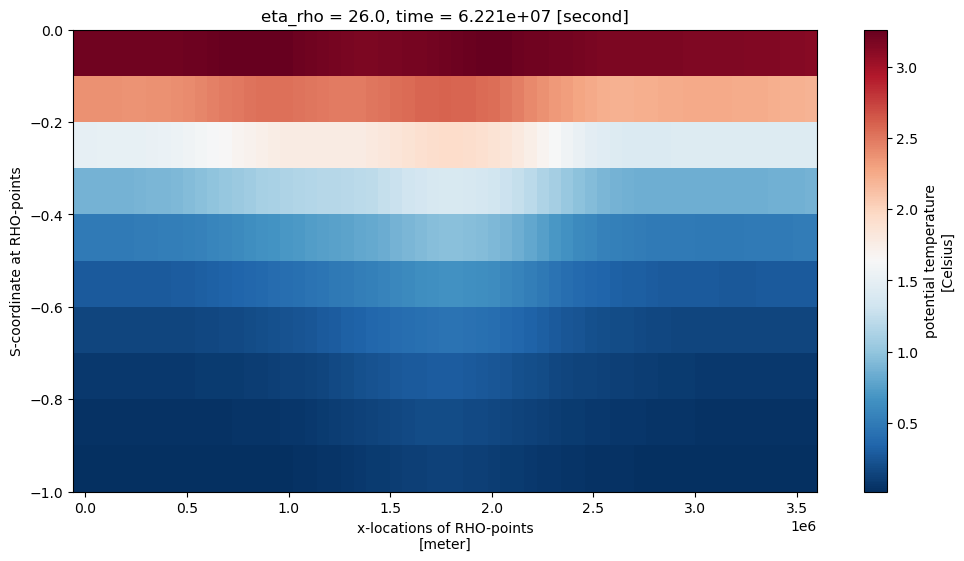

In [37]:

section = ds.temp.isel(eta_rho=int(ds.temp.shape[1]/2-1),xi_rho=slice(0,-1))

section.plot(x=xdim + '_rho', y='s_rho',  figsize=(12, 6), cmap = 'RdBu_r')


## Plot section on z-levels

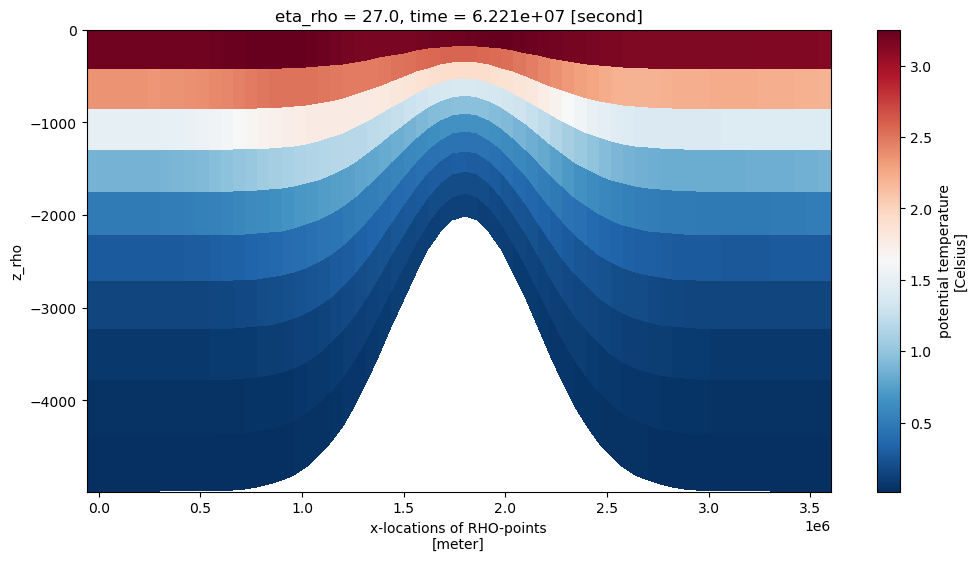

In [38]:


section = ds.temp.isel(eta_rho=int(ds.temp.shape[1]/2),xi_rho=slice(0,-1))

section.plot(x=xdim + '_rho', y='z_rho', figsize=(12, 6), cmap = 'RdBu_r')


## Interpolate variable at a constant depth


/opt/linux/envs/envs/phyocean-2023.05/lib/python3.10/site-packages/xgcm/grid.py:989: FutureWarning: From version 0.8.0 the Axis computation methods will be removed, in favour of using the Grid computation methods instead. i.e. use `Grid.transform` instead of `Axis.transform`
  warnings.warn(


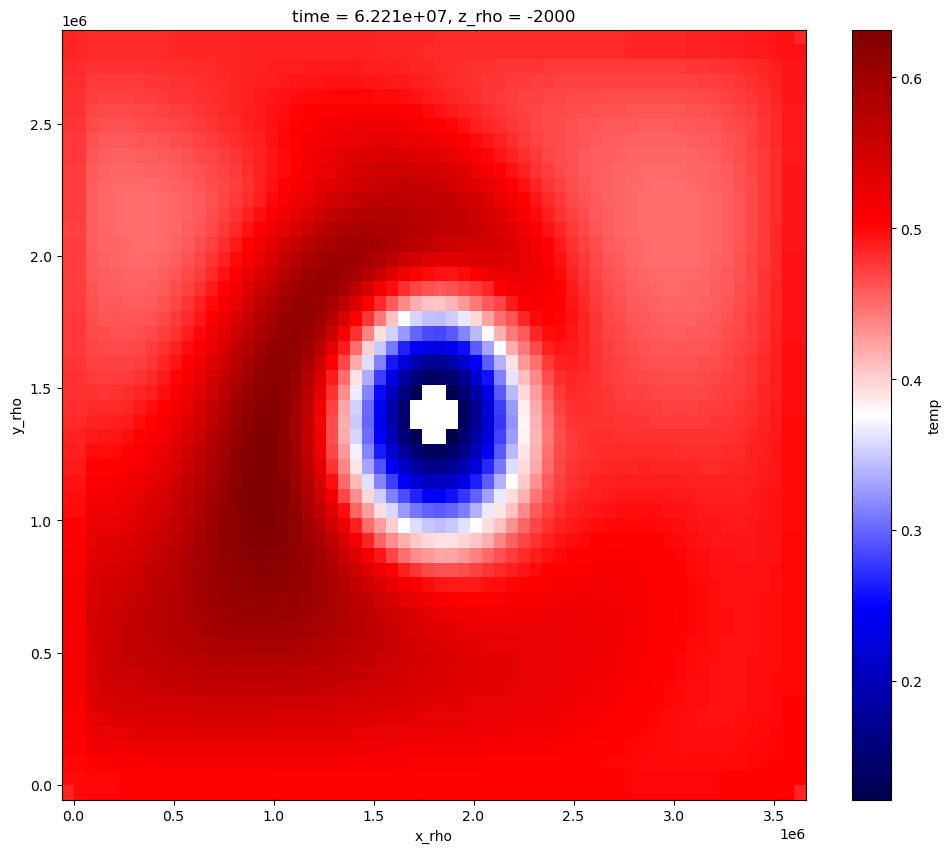

In [39]:

var = grid.transform(ds.temp, 'z', np.array([-2000]), target_data=ds.z_rho).compute()

var.plot(x=xdim + '_rho', y=ydim + '_rho', cmap='seismic', figsize=(12,10))


---

## Derivatives : relative vorticity
\begin{equation}
\xi = - \frac{\partial u}{\partial y} + \frac{\partial v}{\partial x}
\end{equation}

### At the surface 

no interpolation = SSH variations can be neglected

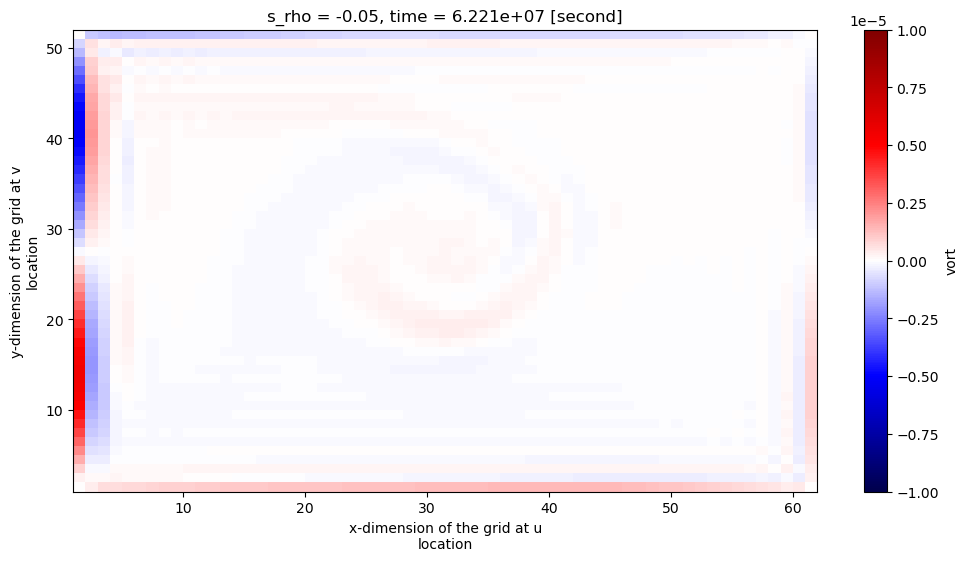

In [40]:
ds['vort'] = (-grid.derivative(ds.u, 'y') + grid.derivative(ds.v, 'x'))

try:
    ds.vort.where(ds.mask_psi==1).isel(s_rho=-1).plot(x=xdim+'_psi', y=ydim+'_psi',\
                                                      vmin=-1e-4, vmax=1e-4, cmap='seismic', figsize=(12,10))
except:
    ds.vort.isel(s_rho=-1).plot(vmin=-1e-5, vmax=1e-5, cmap='seismic', figsize=(12,6))


### At depth

First interpolate velocity fields at constant depth and them compute vorticity

/opt/linux/envs/envs/phyocean-2023.05/lib/python3.10/site-packages/xgcm/grid.py:989: FutureWarning: From version 0.8.0 the Axis computation methods will be removed, in favour of using the Grid computation methods instead. i.e. use `Grid.transform` instead of `Axis.transform`
  warnings.warn(


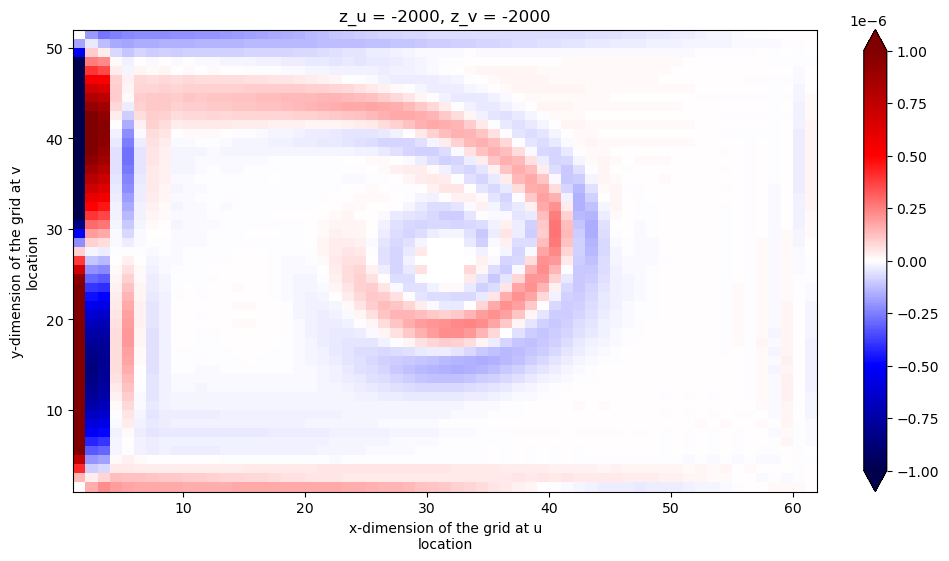

In [41]:
depth = -2000

u_z = grid.transform(ds.u, 'z', np.array([depth]), target_data=ds.z_u).compute()
v_z = grid.transform(ds.v, 'z', np.array([depth]), target_data=ds.z_v).compute()

vort_z = (-grid.derivative(u_z, 'y') + grid.derivative(v_z, 'x')); del u_z,v_z

try:
    vort_z.where(ds.mask_psi==1).plot(x=xdim+'_psi', y=ydim+'_psi',\
                                                 vmin=-1e-5, vmax=1e-5, cmap='seismic', figsize=(12,10))
except:
    vort_z.plot(vmin=-1e-6, vmax=1e-6, cmap='seismic', figsize=(12,6))
    